### Predict house price in real estate data

#### import necessary modules and read the input file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
real_estate_data = pd.read_csv("Real estate_polynomial_regression.csv")

In [3]:
real_estate_data.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
real_estate_data.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

#### Drop columns which are not required, check for null values and treat them if required

In [6]:
real_estate_data.drop(columns={'No','transaction date'}, inplace=True)

In [7]:
real_estate_data.isnull().sum()

house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [8]:
real_estate_data.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


<AxesSubplot:>

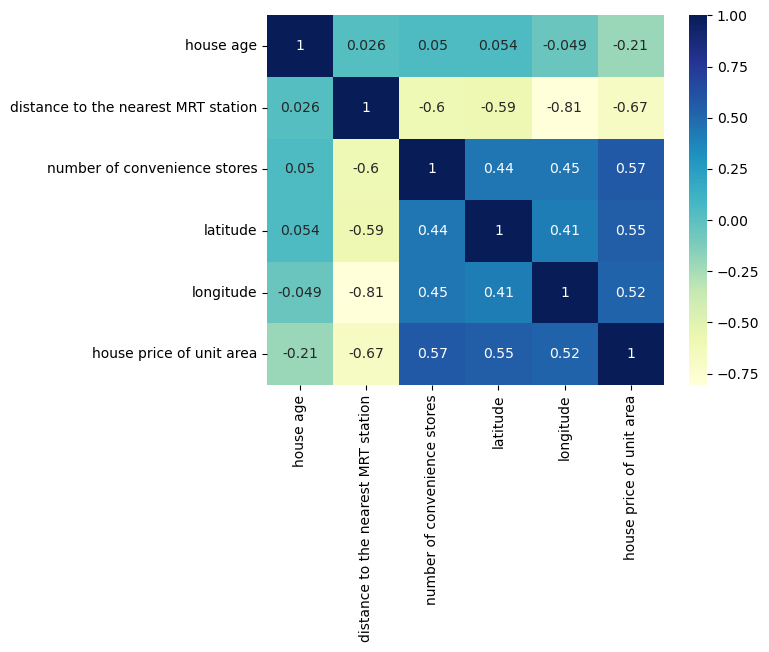

In [10]:
sns.heatmap(real_estate_data.corr(), annot=True,cmap="YlGnBu")

#### The heatmap of correlation chart shows high negative correlation between house price and distance to the nearest MRT station, which is as expected. It also show strong correlation with number of convenience stores.

#### Linear regression can't be applied on dataset with multicolinearity between independent variables. We can demonstrate the same by first applying linear regression on the data

In [11]:
# Splitting variables

X=real_estate_data.drop('house price of unit area', axis=1) # independent
y=real_estate_data['number of convenience stores'] # dependent

In [12]:
X.shape

(414, 5)

In [13]:
y.shape

(414,)

#### Linear Regression

In [14]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     number of convenience stores   R-squared:                       1.000
Model:                                      OLS   Adj. R-squared:                  1.000
Method:                           Least Squares   F-statistic:                 7.711e+27
Date:                          Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                                  19:54:10   Log-Likelihood:                 11347.
No. Observations:                           414   AIC:                        -2.268e+04
Df Residuals:                               408   BIC:                        -2.266e+04
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------

In [15]:
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
model = LinearRegression()
model.fit(X_linear_train, y_linear_train)

LinearRegression()

In [17]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
house age,-1.310343e-19
distance to the nearest MRT station,5.148628e-19
number of convenience stores,1.000000e+00
latitude,6.596508e-16
longitude,3.229477e-16


In [18]:
y_linear_pred = model.predict(X_linear_test)

In [19]:
MAE_linear= metrics.mean_absolute_error(y_linear_test, y_linear_pred)
MSE_linear=metrics.mean_squared_error(y_linear_test, y_linear_pred)
RMSE_linear= np.sqrt(MSE_linear)

pd.DataFrame([MAE_linear, MSE_linear, RMSE_linear],
             index=['MAE_linear', 'MSE_linear', 'RMSE_linear'], columns=['metrics'])

,metrics
MAE_linear,1.275417e-15
MSE_linear,2.727610e-30
RMSE_linear,1.651548e-15


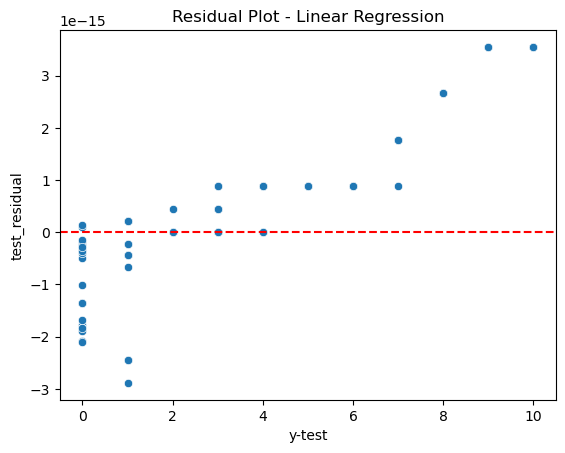

In [20]:
test_residual= y_linear_test - y_linear_pred

sns.scatterplot(x=y_linear_test, y=test_residual)
plt.title('Residual Plot - Linear Regression')
plt.xlabel('y-test')
plt.ylabel('test_residual')
plt.axhline(y=0, color='r', ls='--')

#### The residual plot is not normally distributed due to strong multicolinearity as seen above. Hence, linear regression can't be applied.

#### Polynomial Regression

In [21]:
print('X=',X.shape, 'Y=', y.shape)

X= (414, 5) Y= (414,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
def build_polynomial_models(X_train, y_train, X_test, y_test, max_degree):
    
    train_RMSE_list = []
    test_RMSE_list = []
 
    # runs from degree = 1 to max_degree
    for degree in range(1, max_degree+1):
 
        pipeline_steps = [
            PolynomialFeatures(degree=degree), 
            StandardScaler(), 
            LinearRegression()
        ]
        pipeline = make_pipeline(*pipeline_steps)
 
        # train the model using X_train and y_train
        pipeline.fit(X_train, y_train)
 
        # Predict output for X_train 
        train_predictions = pipeline.predict(X_train)    
        train_RMSE = mean_squared_error(y_train, train_predictions)**0.5
        train_RMSE_list.append(train_RMSE)
 
        # Predict output for X_test (unseen data)
        test_predictions = pipeline.predict(X_test)    
        test_RMSE = mean_squared_error(y_test, test_predictions)**0.5
        test_RMSE_list.append(test_RMSE)
    
    RMSE_df = pd.DataFrame({'Training RMSE': train_RMSE_list, 'Test RMSE': test_RMSE_list}, index=range(1, max_degree+1))
    
    RMSE_df.index.name = 'Degree'  
    
    plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
    plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.legend()

    return RMSE_df

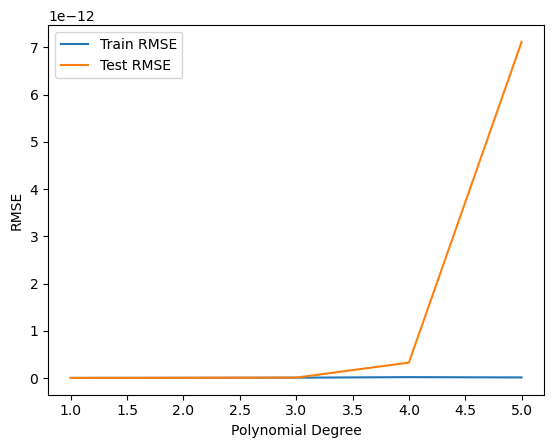

In [24]:
RMSE_df = build_polynomial_models(X_train,y_train,X_test,y_test,12)

In [25]:
RMSE_df

,Training RMSE,Test RMSE
Degree,,
1,1.349571e-15,1.573355e-15
2,3.497152e-15,3.849001e-15
3,6.637632e-15,8.330905e-15
4,1.812144e-14,3.249530e-13
5,1.172863e-14,7.117475e-12
6,1.297648e-14,5.381315e-08
7,7.917478e-15,2.661053e-05
8,1.667230e-14,7.988568e-05
9,1.348480e-14,3.394778e-04


#### After 3 degrees, Test RMSE is significantly higher than Training RMSE. The model is seen to be overfitting after 3 degrees of polynomial

#### We can set the degree to 2 and train the model

In [26]:
pipeline_steps = [
    PolynomialFeatures(degree=2), 
    StandardScaler(), 
    LinearRegression()
]
pipeline = make_pipeline(*pipeline_steps)

# train the model using X_train and y_train
pipeline.fit(X_train, y_train)

# Predict output for X_test (unseen data)
test_predictions = pipeline.predict(X_test)    

test_MAE = metrics.mean_absolute_error(y_test,test_predictions)
test_MSE = metrics.mean_squared_error(y_test,test_predictions)
test_RMSE = np.sqrt(test_MSE)

pd.DataFrame([test_MAE, test_MSE, test_RMSE],
             index=['MAE', 'MSE', 'test_RMSE'], columns=['metrics'])

,metrics
MAE,2.728484e-15
MSE,1.481481e-29
test_RMSE,3.849001e-15
